In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torch.utils.data import TensorDataset

class MY_MLP_CLASS(nn.Module):
    #CLASSA GELEN PARAMETRELERLE CONSTRUCTERLARI SET ETTİM
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MY_MLP_CLASS, self).__init__()
        self.my_sigmoid_function = nn.Sigmoid()
        self.layer_func1 = nn.Linear(input_size, hidden_size1)
        self.layer_func2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer_func3 = nn.Linear(hidden_size2, output_size)
        
        
    def forward(self, our_k):
        our_k = torch.relu(self.layer_func1(our_k))
        our_k = torch.relu(self.layer_func2(our_k))
        our_k = self.layer_func3(our_k)
        our_k = self.my_sigmoid_function(our_k)
        return our_k
        
input_size = 13
hidden_size1 = 50
hidden_size2 = 100
output_size = 1

model = MY_MLP_CLASS(input_size, hidden_size1, hidden_size2, output_size)

torch.manual_seed(190401084)






my_train = r'/content/drive/MyDrive/cure_the_princess_train.csv'
my_test = r'/content/drive/MyDrive/cure_the_princess_test.csv'
my_validation = r'/content/drive/MyDrive/cure_the_princess_validation.csv'

data_train_test = pd.read_csv(my_train)
data_test = pd.read_csv(my_test)
data_validation_test = pd.read_csv(my_validation)






In [ ]:
y_train_value = data_train_test.iloc[:, -1:].values
x_train_value = data_train_test.iloc[:, :-1].values
x_train_value = torch.tensor(x_train_value, dtype=torch.float32)
y_train_value = torch.tensor(y_train_value, dtype=torch.float32)
our_train_data = TensorDataset(x_train_value, y_train_value)
our_train_loader = torch.utils.data.DataLoader(our_train_data, batch_size = 16)
y_testvalue = data_test.iloc[:, -1:].values
x_testvalue = data_test.iloc[:, :-1].values
x_testvalue = torch.tensor(x_testvalue, dtype=torch.float32)
y_testvalue = torch.tensor(y_testvalue, dtype=torch.float32)
our_test_data = TensorDataset(x_testvalue, y_testvalue)
our_test_loader = torch.utils.data.DataLoader(our_test_data, batch_size = 16)
y_validvalue = data_validation_test.iloc[:, -1:].values
x_validvalue = data_validation_test.iloc[:, :-1].values
x_validvalue = torch.tensor(x_validvalue, dtype=torch.float32)
y_validvalue = torch.tensor(y_validvalue, dtype=torch.float32)
our_valid_data = TensorDataset(x_validvalue, y_validvalue)
our_valit_loader = torch.utils.data.DataLoader(our_valid_data, batch_size = 16)



learning_rate = 0.01
num_epochs = 10


num_hidden_neuron = 5000

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for epoch in range(num_epochs):

    train_loss = 0.0
    train_count = 0.0
    for inputs, labels in our_train_loader:

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_count += 1.0
        train_loss += loss.item()

    print("Epo:", epoch, "Training loss", train_loss/train_count)

print('Finish')

Epoch 0 Training loss 0.06392628071487799
Epoch 1 Training loss 0.06109589537240188
Epoch 2 Training loss 0.059608677935586135
Epoch 3 Training loss 0.0584694014337574
Epoch 4 Training loss 0.05662632827599875
Epoch 5 Training loss 0.05588489381266357
Epoch 6 Training loss 0.053998101159305416
Epoch 7 Training loss 0.05258009592631148
Epoch 8 Training loss 0.05195359327341135
Epoch 9 Training loss 0.050867604009241243
Finished Training


Epoch 0 Training loss 0.022239388085318185 Validation Loss : 0.24927271571796156
Epoch 1 Training loss 0.021810844811740556 Validation Loss : 0.2510955657591694
Earlystopping Patience Counter: 1
Epoch 2 Training loss 0.021412905594451897 Validation Loss : 0.2513507497584214
Earlystopping Patience Counter: 2
Epoch 3 Training loss 0.02087471153310064 Validation Loss : 0.2510656630533049
Earlystopping Patience Counter: 3
Epoch 4 Training loss 0.020597450661360983 Validation Loss : 0.2561420314377756
Earlystopping Patience Counter: 4
Epoch 5 Training loss 0.0207065545977388 Validation Loss : 0.25931656720640606
Earlystopping Patience Counter: 5
Epoch 6 Training loss 0.019647282798762752 Validation Loss : 0.25805837577936475
Earlystopping Patience Counter: 6
Epoch 7 Training loss 0.019613791780643566 Validation Loss : 0.2599887772652437
Earlystopping Patience Counter: 7
Epoch 8 Training loss 0.019181068777769827 Validation Loss : 0.260268951310718
Earlystopping Patience Counter: 8
Epoch 9 T

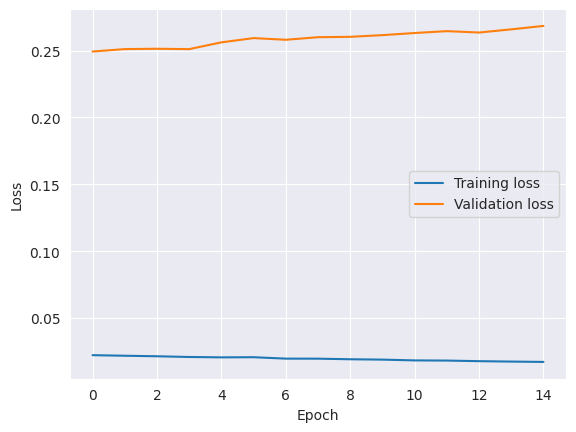

Finished Training


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

learning_rate = 0.01
num_epochs = 45
patience = 14


num_hidden_neuron = 5000

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

list_train_loss, list_val_loss = [], []

best_val_loss = None

patience_counter = 0
for epoch in range(num_epochs):

  train_loss = 0.0
  train_count = 0.0
  for inputs, labels in our_train_loader:

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    train_count += 1.0
    train_loss += loss.item()

  val_loss = 0.0
  with torch.no_grad():
    model.eval()
    for inputs, labels in our_valit_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

  model.train()

  train_loss /= train_count
  val_loss /= len(our_valit_loader)

  print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",val_loss)

  list_train_loss.append(train_loss)
  list_val_loss.append(val_loss)

  val_score = val_loss
  if best_val_loss is None:
    best_val_loss = val_score 
    torch.save(model.state_dict(), "checkpoint.pt")
  elif best_val_loss < val_score:
    patience_counter += 1
    print("Earlystopping Patience Counter:",patience_counter)
    if patience_counter == patience:
        break
  else:
    best_val_loss = val_score
    torch.save(model.state_dict(), "checkpoint.pt")
    patience_counter = 0

sns.set_style("darkgrid")
plt.plot(list_train_loss, label="Training loss")
plt.plot(list_val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


print('Finished ')